<a href="https://colab.research.google.com/github/DEZE007/Quantum-Hackaton-CICC/blob/main/qrng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **QRNG** - *Quantum Random Number Generation*
* October 15°, 2025
#### CIC - IPN: *Qiskit Fall Fest*

> Alexander Sanchez

* How to install qiskit-aer:

You can install `qiskit-aer` using pip:

```bash
pip install qiskit-aer
```

Or if you prefer using conda:

```bash
conda install -c conda-forge qiskit-aer
```

**Note**: `qiskit-aer` is the high-performance simulator for Qiskit that provides noise models and advanced simulation capabilities. It's essential for running quantum circuits locally with realistic noise modeling.

In [39]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install qiskit[visualization]

* Define the quantum circuit

Quantum Circuit:


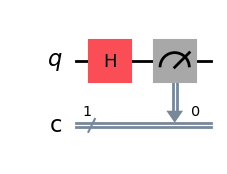

In [ ]:
# Perform a quantum random number generation using Qiskit simulating locally
# and visualize the results with matplotlib and seaborn
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator

# Set up the quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)  # Apply Hadamard gate to create superposition
qc.measure(0, 0)  # Measure the qubit

print("Quantum Circuit:")
qc.draw(output='mpl')

* Simulate the circuit


Measurement results: {'1': 526, '0': 498}


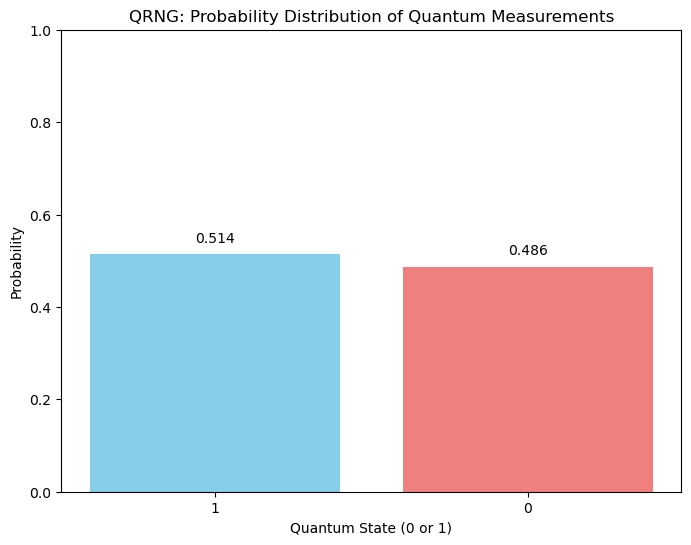

In [ ]:
# Simulate the circuit
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1024)
# job = simulator.run(transpiled_circuit, shots=1024, seed_simulator=42)
result = job.result()
counts = result.get_counts()

print(f"\nMeasurement results: {counts}")

# Alternative visualization using matplotlib
plt.figure(figsize=(8, 6))
states = list(counts.keys())
probabilities = [counts[state]/1024 for state in states]

plt.bar(states, probabilities, color=['skyblue', 'lightcoral'])
plt.xlabel('Quantum State (0 or 1)')
plt.ylabel('Probability')
plt.title('QRNG: Probability Distribution of Quantum Measurements')
plt.ylim(0, 1)

# Add probability labels on bars
for i, prob in enumerate(probabilities):
    plt.text(i, prob + 0.02, f'{prob:.3f}', ha='center', va='bottom')

plt.show()

* **Challenge**: Generate a random number (base 10) given a range between `n` and `m` using the quantum circuit above.

In [40]:
import math

# Initialize the simulator once for efficiency
simulator = AerSimulator()

def get_random_bit() -> int:
    """
    Simulates the execution of the quantum circuit (H + Measurement)
    to obtain a single random bit (0 or 1).
    """
    # 1. Define the single-qubit circuit
    qc = QuantumCircuit(1, 1)
    qc.h(0)            # Hadamard gate for superposition
    qc.measure(0, 0)   # Measurement

    # 2. Run the simulation with 1 shot to obtain a single result
    transpiled_circuit = transpile(qc, simulator)
    job = simulator.run(transpiled_circuit, shots=1)
    result = job.result()
    counts = result.get_counts()

    # 3. Extract the resulting bit (the result will be '0' or '1')
    # Since we only requested 1 shot, the result is the only key in the dictionary
    random_bit_str = list(counts.keys())[0]
    return int(random_bit_str)

def generate_random_number(n: int, m: int) -> int:
    """
    Generates a random integer within the range [n, m] using bits
    produced by the quantum circuit simulation.
    """
    # 1. Determine the size of the range (Delta)
    delta = m - n + 1
    if delta <= 0:
        raise ValueError("Invalid range: n must be less than or equal to m.")

    # 2. Determine the number of qubits (L) required.
    # L is the minimum number of bits needed to represent a number up to delta - 1.
    L = math.ceil(math.log2(delta))

    # 3. Rejection Sampling Algorithm
    while True:
        R_dec = 0

        # Generate a random number R_dec using L quantum bits.
        for i in range(L):
            # Obtain a random bit from the Qiskit simulator
            bit = get_random_bit()
            # Combine the bits to form the decimal number
            R_dec += bit * (2 ** i)

        # 4. Rejection condition: if R_dec falls outside the range [0, delta - 1], repeat.
        if R_dec < delta:
            # 5. Shift the result to the range [n, m]
            random_number = R_dec + n
            return random_number

# Example usage
n = 10
m = 50
random_number = generate_random_number(n, m)
print(f"\nRandom number between {n} and {m}: {random_number}")



Random number between 10 and 50: 22


First 10 generated numbers: [12, 48, 47, 11, 27, 29, 16, 27, 20, 46]


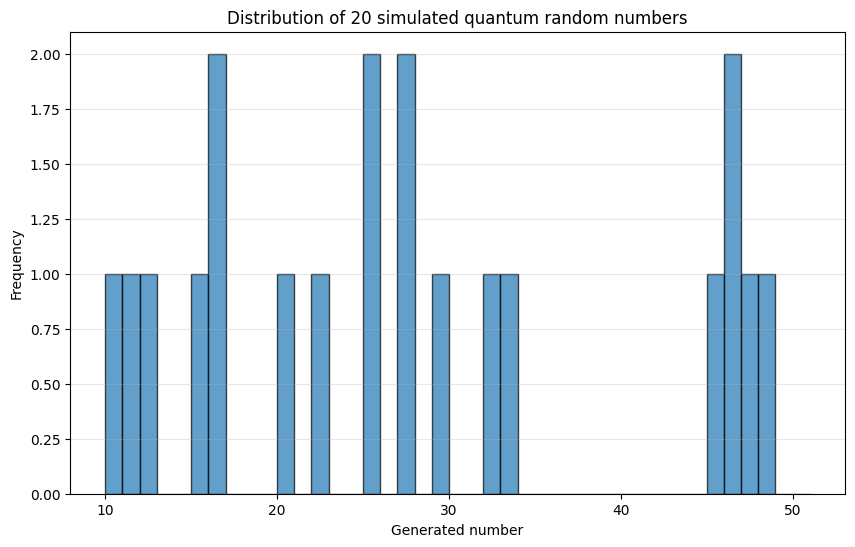

In [44]:


# --- ADDITIONAL BLOCK TO RUN MULTIPLE TIMES AND PLOT A HISTOGRAM ---

import matplotlib.pyplot as plt

# Number of samples to generate
num_samples = 20  # you can adjust this value

# Generate multiple random numbers using your existing function
results = [generate_random_number(n, m) for _ in range(num_samples)]

# Show the first few generated numbers for verification
print(f"First 10 generated numbers: {results[:10]}")

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(results, bins=range(n, m + 2), edgecolor='black', alpha=0.7)
plt.title(f"Distribution of {num_samples} simulated quantum random numbers")
plt.xlabel("Generated number")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()
